<a href="https://colab.research.google.com/github/HeerKukreja/Flood-Prediction-using-AI/blob/add_python/Flood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
path = "/content/drive/My Drive/FloodPrediction/WeatherData.csv"
dataset = pd.read_csv(path)

In [ ]:
dataset.shape

(3652, 5)

In [ ]:
X = dataset.iloc[:,0:4].values
y = dataset.iloc[:, 4].values

In [ ]:
X

array([[6.3000e-01, 1.6579e-02, 8.3120e+01, 9.7380e+01],
       [3.0000e-02, 1.5248e-02, 7.7010e+01, 9.7540e+01],
       [1.0000e-02, 1.3812e-02, 7.3860e+01, 9.7570e+01],
       ...,
       [8.8000e-01, 1.6379e-02, 7.6940e+01, 9.7400e+01],
       [4.2000e-01, 1.6078e-02, 7.6560e+01, 9.7460e+01],
       [6.4000e-01, 1.6404e-02, 7.9000e+01, 9.7510e+01]])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_test

array([[-0.56440558, -1.85387077, -1.99031136,  1.38227554],
       [ 0.18852632,  0.5829366 ,  1.19203683, -0.46822633],
       [ 0.80582908,  0.59145832,  0.97643667, -0.97290866],
       ...,
       [ 0.37739308,  1.16079067,  1.00563253, -0.63645377],
       [-0.42877643,  0.86293611,  0.92253663, -0.91683284],
       [-0.57581364, -2.95236161, -2.41103112,  1.49442717]])

In [ ]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X_train.shape

(2921, 4)

In [ ]:
y_train.shape

(2921,)

In [ ]:
from sklearn.utils import resample

In [ ]:
import numpy as np
X = np.concatenate((X_train, y_train[:,None]), axis=1)

In [ ]:
no_floods = X[X[:,4]==0]
floods = X[X[:,4]==1]

In [ ]:
no_floods_downsampled = resample(no_floods,
                                replace = False, # sample without replacement
                                n_samples = len(floods), # match minority n
                                random_state = 27) # reproducible results

In [ ]:
downsampled = np.concatenate([no_floods_downsampled, floods])

In [ ]:
np.random.shuffle(downsampled)

In [ ]:
X = downsampled[:,0:4]
y = downsampled[:, 4]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred=svclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3 0]
 [0 3]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         3
         1.0       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

In [ ]:
import seaborn as sn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


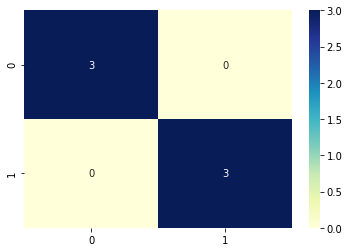

In [ ]:
sn.heatmap(conf_mat,annot=True,cmap="YlGnBu")

In [ ]:

from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential


In [ ]:
classifierann = Sequential()


In [ ]:
classifierann.add(Dense(6, activation = 'relu', input_dim = 4))

In [ ]:
classifierann.add(Dense(6, activation='relu'))

In [ ]:
classifierann.add(Dense(1, activation='sigmoid'))

In [ ]:
classifierann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
classifierann.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
3/3 [==============================] - 0s 3ms/step - loss: 1.0573 - accuracy: 0.2083
Epoch 2/150
3/3 [==============================] - 0s 2ms/step - loss: 1.0405 - accuracy: 0.2083
Epoch 3/150
3/3 [==============================] - 0s 2ms/step - loss: 1.0347 - accuracy: 0.2083
Epoch 4/150
3/3 [==============================] - 0s 2ms/step - loss: 0.9501 - accuracy: 0.2083
Epoch 5/150
3/3 [==============================] - 0s 2ms/step - loss: 0.9581 - accuracy: 0.2083
Epoch 6/150
3/3 [==============================] - 0s 2ms/step - loss: 0.8913 - accuracy: 0.1667
Epoch 7/150
3/3 [==============================] - 0s 1ms/step - loss: 0.8888 - accuracy: 0.1667
Epoch 8/150
3/3 [==============================] - 0s 2ms/step - loss: 0.8101 - accuracy: 0.1667
Epoch 9/150
3/3 [==============================] - 0s 1ms/step - loss: 0.7977 - accuracy: 0.1667
Epoch 10/150
3/3 [==============================] - 0s 2ms/step - loss: 0.7921 - accuracy: 0.1250
Epoch 11/150
3/3 [===========

In [ ]:
y_pred_ann = classifierann.predict(X_test) 

In [ ]:
import numpy as np
y_pred_ann = (y_pred_ann>0.5).astype(np.int32)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_ann))
print(classification_report(y_test, y_pred_ann))

[[3 0]
 [0 3]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         3
         1.0       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [ ]:
conf_mat_ann = confusion_matrix(y_test, y_pred_ann)

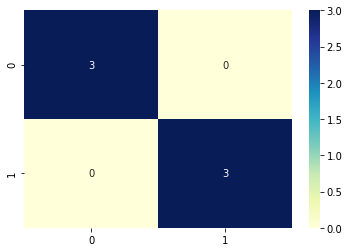

In [ ]:
sn.heatmap(conf_mat_ann, annot=True, cmap="YlGnBu")